In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from task_4_9 import *
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [20]:
env = Environment(bank=10, target=100, p=0.4)
my_agent = Agent(env, eps=0.1)
my_agent.fit()

book_policy = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 18, 6, 5, 4, 3, 23, 1, 25,
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 43, 6, 45, 4, 3, 2, 1, 50,
    1, 2, 3, 46, 5, 6, 43, 8, 9, 10, 11, 12, 12, 11, 10, 9, 17, 18, 6, 5, 4, 3, 27, 1, 25,
    24, 23, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1,

]
book_agent = Agent(env, greedy_actions=np.array([0] + book_policy + [0]))

Text(0.5, 1.0, 'Book Policy')

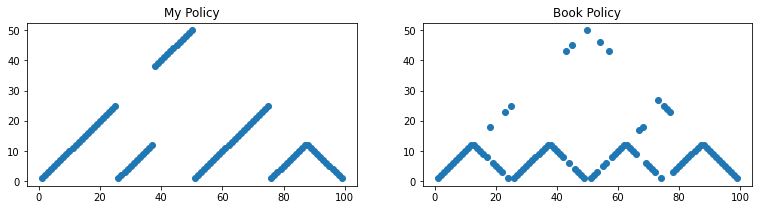

In [30]:
fix, axs = plt.subplots(1, 2, figsize=(13, 3))
axs[0].scatter(x=range(1, env.target), y=my_agent.greedy_actions[1:-1])
axs[0].set_title("My Policy")
axs[1].scatter(x=range(1, env.target), y=book_agent.greedy_actions[1:-1])
axs[1].set_title("Book Policy")

In [34]:
my_agent.greedy_actions[24], book_agent.greedy_actions[24]

(24, 1)

In [40]:
env = Environment(bank=24, target=100, p=0.4)
games = 1_000_000
my_rewards = 0
book_rewards = 0
for game in tqdm(range(games)):
    env.reset()
    state = State(reward=0., is_done=False, bank=env.bank)
    while not state.is_done:
        stake = my_agent.act(state.bank)
        state = env.step(stake)
    my_rewards += state.reward
    env.reset()
    state = State(reward=0., is_done=False, bank=env.bank)
    while not state.is_done:
        stake = book_agent.act(state.bank)
        state = env.step(stake)
    book_rewards += state.reward
print(f"My wins: {my_rewards}, book wins: {book_rewards}")

  0%|          | 0/1000000 [00:00<?, ?it/s]

My wins: 144465, book wins: 143959


In [42]:
wins = 0.
for bank in tqdm(range(1, 100)):
    env = Environment(bank=bank, target=100, p=0.4)
    my_rewards = book_rewards = 0.
    games = 100_000
    for ix in range(games):
        env.reset()
        state = State(reward=0., is_done=False, bank=env.bank)
        while not state.is_done:
            stake = my_agent.act(state.bank)
            state = env.step(stake)
        my_rewards += state.reward
        env.reset()
        state = State(reward=0., is_done=False, bank=env.bank)
        while not state.is_done:
            stake = book_agent.act(state.bank)
            state = env.step(stake)
        book_rewards += state.reward
    if my_rewards > book_rewards:
        wins += 1.
    else:
        wins -= 1.
print(wins)

  0%|          | 0/99 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
env = Environment(bank=18, target=100, p=0.4)
rewards = 0.
games = 1_000_000
for ix in tqdm(range(games)):
    env.reset()
    state = State(reward=0., is_done=False, bank=env.bank)
    while not state.is_done:
        stake = my_agent.act(state.bank)
        state = env.step(stake)
    rewards += state.reward
print(rewards / games)

In [ ]:
env = Environment(bank=18, target=100, p=0.4)
rewards = 0.
games = 1_000_000
for ix in tqdm(range(games)):
    env.reset()
    state = State(reward=0., is_done=False, bank=env.bank)
    while not state.is_done:
        stake = book_agent.act(state.bank)
        state = env.step(stake)
    rewards += state.reward
print(rewards / games)

In [ ]:
plt.scatter(x=range(1, env.target), y=agent.greedy_actions[1:-1])

In [ ]:
agent.greedy_actions

In [3]:
def train(ph=0.4, Theta=0.000001):
    V = [0]*100
    for i in range(0, 100):
        V[i] = np.random.random() * 1000
    V[0] = 0
    pi = [0]*100
    counter = 1
    while True:
        Delta = 0
        for s in range(1, 100):  # for each state
            old_v = V[s]
            v = [0] * 51
            for a in range(1, min(s, 100 - s) + 1):
                v[a] = 0
                if a + s < 100:
                    v[a] += ph * (0 + V[s + a])
                    v[a] += (1 - ph) * (0 + V[s - a])
                elif a + s == 100:
                    v[a] += ph
                    v[a] += (1 - ph) * (0 + V[s - a])
            op_a = np.argmax(v)
            pi[s] = op_a
            V[s] = v[op_a]
            Delta = max(Delta, abs(old_v - V[s]))
        counter += 1
        if counter % 1000 == 0:
            print("train loop" + str(counter))
            print("Delta =" + str(Delta))
        if Delta < Theta:
            break
    return [V[1:100], pi[1:100]]

v, pi = train()

In [ ]:
len(pi)

In [ ]:
plt.bar(x=range(1, env.target), height=pi)

In [ ]:
plt.bar(x=range(1, env.target), height=agent.greedy_actions[1:-1])

In [ ]:
env = Environment(bank=10, target=100, p=0.25)
agent = Agent(env)
agent.fit()
plt.plot(range(1, 100), agent.greedy_actions[1:-1])

In [ ]:
help(plt.plot)

<BarContainer object of 99 artists>

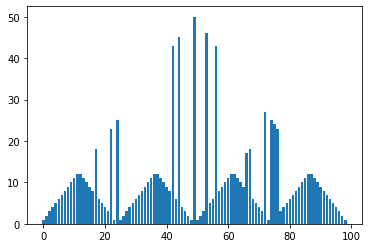

In [8]:
plt.bar(x = np.arange(len(pi)), height=pi)

In [9]:
pi

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 12,
 11,
 10,
 9,
 8,
 18,
 6,
 5,
 4,
 3,
 23,
 1,
 25,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 12,
 11,
 10,
 9,
 8,
 43,
 6,
 45,
 4,
 3,
 2,
 1,
 50,
 1,
 2,
 3,
 46,
 5,
 6,
 43,
 8,
 9,
 10,
 11,
 12,
 12,
 11,
 10,
 9,
 17,
 18,
 6,
 5,
 4,
 3,
 27,
 1,
 25,
 24,
 23,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]